In [ ]:
import pandas as pd
file_path = r'dataset.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)
df.columns = ['label', 'text']
X = df['text'].values
y = df['label'].values
print(df.head())

      label                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


6th Question

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Training set size: 2907
Validation set size: 969
Test set size: 970


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("Shape of TF-IDF vectors - Train:", X_train_tfidf.shape)
print("Shape of TF-IDF vectors - Validation:", X_val_tfidf.shape)
print("Shape of TF-IDF vectors - Test:", X_test_tfidf.shape)
print(tfidf_vectorizer.get_feature_names_out())
print(tfidf_vectorizer.idf_)
print(X_train_tfidf.toarray())
print(X_train_tfidf)

Shape of TF-IDF vectors - Train: (2907, 7589)
Shape of TF-IDF vectors - Validation: (969, 7589)
Shape of TF-IDF vectors - Test: (970, 7589)
['00' '000' '002' ... 'ærvinen' 'ætehuolto' 'ðl']
[6.41027148 4.34049185 8.28207366 ... 8.28207366 8.28207366 8.28207366]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.18149305 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
  (0, 4781)	0.22495766285627808
  (0, 2679)	0.20911221257257742
  (0, 1503)	0.20911221257257742
  (0, 2213)	0.265547756265748
  (0, 1971)	0.265547756265748
  (0, 5920)	0.1090774818860793
  (0, 7533)	0.12413014180571097
  (0, 2277)	0.17137903949076483
  (0, 793)	0.1720741870809667
  (0, 7368)	0

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
y_val_pred = clf.predict(X_val_tfidf)

print('\npredictions v/s real values')
for real, pred in zip(y_val[:10], y_val_pred[:10]):
    print(f'Real: {real}, Predicted: {pred}')

val_accuracy = accuracy_score(y_val, y_val_pred)
print("\n\nValidation Accuracy:", val_accuracy)
y_test_pred = clf.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


predictions v/s real values
Real: neutral, Predicted: neutral
Real: neutral, Predicted: neutral
Real: neutral, Predicted: neutral
Real: positive, Predicted: neutral
Real: negative, Predicted: neutral
Real: positive, Predicted: neutral
Real: neutral, Predicted: neutral
Real: negative, Predicted: neutral
Real: neutral, Predicted: neutral
Real: neutral, Predicted: neutral


Validation Accuracy: 0.6625386996904025
Test Accuracy: 0.6721649484536083

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.07      0.14       110
     neutral       0.67      0.99      0.80       571
    positive       0.68      0.28      0.40       289

    accuracy                           0.67       970
   macro avg       0.78      0.45      0.44       970
weighted avg       0.71      0.67      0.60       970



In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_tfidf, y_train)
y_test_pred = svm_clf.predict(X_test_tfidf)

print('\npredictions v/s real values')
for real, pred in zip(y_val[:10], y_val_pred[:10]):
    print(f'Real: {real}, Predicted: {pred}')

test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


predictions v/s real values
Real: neutral, Predicted: neutral
Real: neutral, Predicted: neutral
Real: neutral, Predicted: neutral
Real: positive, Predicted: neutral
Real: negative, Predicted: neutral
Real: positive, Predicted: neutral
Real: neutral, Predicted: neutral
Real: negative, Predicted: neutral
Real: neutral, Predicted: neutral
Real: neutral, Predicted: neutral

Test Accuracy: 0.7814432989690722

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.59      0.71       110
     neutral       0.77      0.94      0.84       571
    positive       0.80      0.55      0.65       289

    accuracy                           0.78       970
   macro avg       0.82      0.69      0.73       970
weighted avg       0.79      0.78      0.77       970



In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_tfidf, y_train)
y_test_pred = log_reg.predict(X_test_tfidf)

print('\npredictions v/s real values')
for real, pred in zip(y_test[:10], y_test_pred[:10]):
    print(f'Real: {real}, Predicted: {pred}')

test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))



predictions v/s real values
Real: neutral, Predicted: neutral
Real: neutral, Predicted: neutral
Real: neutral, Predicted: neutral
Real: neutral, Predicted: positive
Real: neutral, Predicted: neutral
Real: neutral, Predicted: neutral
Real: positive, Predicted: positive
Real: neutral, Predicted: neutral
Real: neutral, Predicted: neutral
Real: neutral, Predicted: neutral

Test Accuracy: 0.7587628865979381

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.47      0.62       110
     neutral       0.74      0.95      0.83       571
    positive       0.78      0.49      0.60       289

    accuracy                           0.76       970
   macro avg       0.81      0.64      0.69       970
weighted avg       0.77      0.76      0.74       970



In [ ]:
#text summarization

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from heapq import nlargest

text = "Investment in financial markets is a cornerstone of modern economic activity. From stocks and bonds to cryptocurrencies and commodities, individuals and institutions alike engage in a variety of financial instruments to grow wealth, hedge against risks, and achieve financial goals. Understanding market dynamics, risk management strategies, and regulatory frameworks is essential for success in finance. The global financial system, comprising banks, stock exchanges, central banks, and regulatory bodies, plays a crucial role in allocating capital, facilitating transactions, and ensuring stability. Whether it's analyzing financial statements, conducting market research, or making investment decisions, finance is a complex and dynamic field that impacts individuals, businesses, and economies worldwide"


# Tokenize the text into sentences
sentences = sent_tokenize(text)

# Tokenize the text into words
words = word_tokenize(text)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Calculate word frequencies
word_freq = FreqDist(filtered_words)

# Calculate sentence scores based on word frequencies
sent_scores = {}
for sentence in sentences:
    for word in word_tokenize(sentence.lower()):
        if word in word_freq:
            if len(sentence.split(' ')) < 30:  # consider only sentences with less than 30 words
                if sentence not in sent_scores:
                    sent_scores[sentence] = word_freq[word]
                else:
                    sent_scores[sentence] += word_freq[word]

# Select the top 3 sentences with highest scores to form the summary
summary_sentences = nlargest(3, sent_scores, key=sent_scores.get)
summary = ' '.join(summary_sentences)

# Print the summary
print('\n\n',summary,'\n\n')




 The global financial system, comprising banks, stock exchanges, central banks, and regulatory bodies, plays a crucial role in allocating capital, facilitating transactions, and ensuring stability. Whether it's analyzing financial statements, conducting market research, or making investment decisions, finance is a complex and dynamic field that impacts individuals, businesses, and economies worldwide From stocks and bonds to cryptocurrencies and commodities, individuals and institutions alike engage in a variety of financial instruments to grow wealth, hedge against risks, and achieve financial goals. 




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


7th Question

In [ ]:
#data

import pandas as pd
file_path = r'dataset.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)
df.columns = ['label', 'text']
X = df['text'].values
y = df['label'].values
print(df.head())


      label                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


In [ ]:
#RNN

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Padding sequences
max_len = max(len(seq) for seq in X_seq)
X_padded = pad_sequences(X_seq, maxlen=max_len, padding='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import LabelEncoder

# Assuming y_train and y_test are arrays containing the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Model building
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    SimpleRNN(units=32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))


Epoch 1/10
122/122 [==============================] - 9s 51ms/step - loss: -0.6246 - accuracy: 0.5859 - val_loss: -1.4227 - val_accuracy: 0.5887
Epoch 2/10
122/122 [==============================] - 4s 34ms/step - loss: -1.4341 - accuracy: 0.5955 - val_loss: -2.1021 - val_accuracy: 0.5876
Epoch 3/10
122/122 [==============================] - 6s 47ms/step - loss: -1.9948 - accuracy: 0.5955 - val_loss: -2.7864 - val_accuracy: 0.5876
Epoch 4/10
122/122 [==============================] - 4s 35ms/step - loss: -2.5232 - accuracy: 0.5949 - val_loss: -3.4234 - val_accuracy: 0.5876
Epoch 5/10
122/122 [==============================] - 4s 34ms/step - loss: -3.0083 - accuracy: 0.5947 - val_loss: -4.0468 - val_accuracy: 0.5876
Epoch 6/10
122/122 [==============================] - 6s 46ms/step - loss: -3.4662 - accuracy: 0.5934 - val_loss: -4.6432 - val_accuracy: 0.5876
Epoch 7/10
122/122 [==============================] - 4s 34ms/step - loss: -3.8770 - accuracy: 0.5924 - val_loss: -5.2257 - val_ac

Epoch 1/10
122/122 [==============================] - 8s 68ms/step - loss: -10.9081 - accuracy: 0.5955 - val_loss: -13.7739 - val_accuracy: 0.5887
Epoch 2/10
122/122 [==============================] - 6s 46ms/step - loss: -11.3909 - accuracy: 0.5955 - val_loss: -14.3474 - val_accuracy: 0.5887
Epoch 3/10
122/122 [==============================] - 4s 35ms/step - loss: -11.8735 - accuracy: 0.5955 - val_loss: -14.9498 - val_accuracy: 0.5887
Epoch 4/10
122/122 [==============================] - 5s 39ms/step - loss: -12.3500 - accuracy: 0.5955 - val_loss: -15.5551 - val_accuracy: 0.5887
Epoch 5/10
122/122 [==============================] - 9s 70ms/step - loss: -12.8395 - accuracy: 0.5955 - val_loss: -16.1333 - val_accuracy: 0.5887
Epoch 6/10
122/122 [==============================] - 7s 61ms/step - loss: -13.3280 - accuracy: 0.5955 - val_loss: -16.7269 - val_accuracy: 0.5887
Epoch 7/10
122/122 [==============================] - 5s 39ms/step - loss: -13.8249 - accuracy: 0.5955 - val_loss: -17

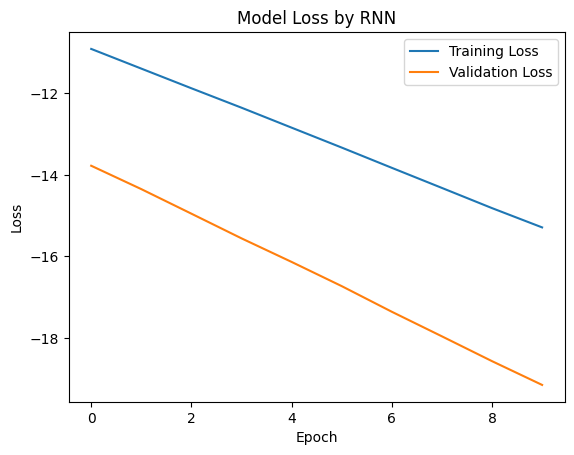

In [ ]:
import matplotlib.pyplot as plt

# Train the model and save history
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss by RNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/10
122/122 [==============================] - 11s 77ms/step - loss: -2439.0974 - accuracy: 0.5947 - val_loss: -23925.2285 - val_accuracy: 0.5887
Epoch 2/10
122/122 [==============================] - 6s 52ms/step - loss: -279420.1875 - accuracy: 0.5955 - val_loss: -1206545.8750 - val_accuracy: 0.5887
Epoch 3/10
122/122 [==============================] - 6s 53ms/step - loss: -3976512.0000 - accuracy: 0.5955 - val_loss: -11797018.0000 - val_accuracy: 0.5887
Epoch 4/10
122/122 [==============================] - 5s 42ms/step - loss: -24708338.0000 - accuracy: 0.5955 - val_loss: -58272180.0000 - val_accuracy: 0.5887
Epoch 5/10
122/122 [==============================] - 7s 54ms/step - loss: -94832856.0000 - accuracy: 0.5955 - val_loss: -192483664.0000 - val_accuracy: 0.5887
Epoch 6/10
122/122 [==============================] - 6s 52ms/step - loss: -257493728.0000 - accuracy: 0.5955 - val_loss: -475197344.0000 - val_accuracy: 0.5887
Epoch 7/10
122/122 [==============================] -

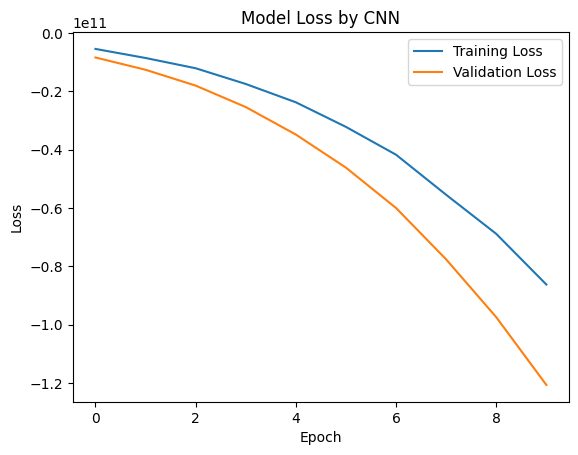

In [ ]:
#CNN

from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout

# Model building
model1 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))


history1 = model1.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Plot loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss by CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
122/122 [==============================] - 43s 314ms/step - loss: -2.7369 - accuracy: 0.5955 - val_loss: -5.0079 - val_accuracy: 0.5887
Epoch 2/10
122/122 [==============================] - 36s 299ms/step - loss: -5.0428 - accuracy: 0.5955 - val_loss: -7.4860 - val_accuracy: 0.5887
Epoch 3/10
122/122 [==============================] - 38s 312ms/step - loss: -6.9761 - accuracy: 0.5955 - val_loss: -9.7928 - val_accuracy: 0.5887
Epoch 4/10
122/122 [==============================] - 35s 290ms/step - loss: -8.9237 - accuracy: 0.5955 - val_loss: -12.2036 - val_accuracy: 0.5887
Epoch 5/10
122/122 [==============================] - 36s 294ms/step - loss: -10.8154 - accuracy: 0.5955 - val_loss: -14.5079 - val_accuracy: 0.5887
Epoch 6/10
122/122 [==============================] - 35s 288ms/step - loss: -12.6587 - accuracy: 0.5955 - val_loss: -16.8159 - val_accuracy: 0.5887
Epoch 7/10
122/122 [==============================] - 37s 301ms/step - loss: -14.5429 - accuracy: 0.5955 - val_lo

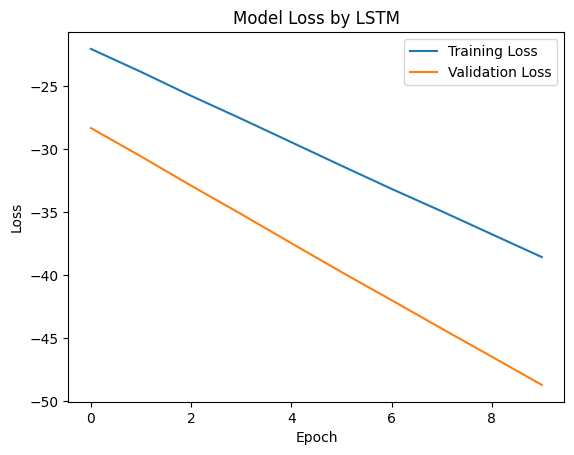

In [ ]:
#LSTM

from tensorflow.keras.layers import LSTM

# Model building
model2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))


history2 = model2.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Plot loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss by LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()